In [1]:
import cv2

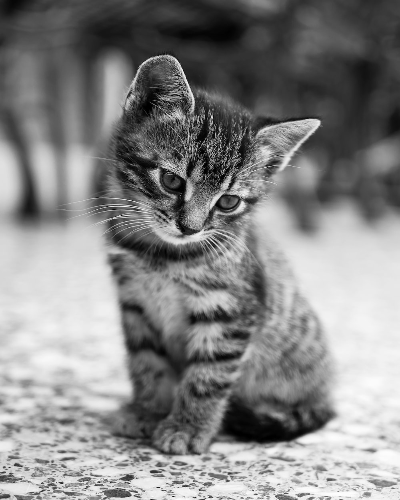

In [30]:
image = cv2.imread("/content/cat_image.jpg",cv2.IMREAD_GRAYSCALE)
from google.colab.patches import cv2_imshow
my_image = cv2.resize(image, (400, 500))
cv2_imshow(my_image)

In [31]:
import numpy as np
first_order_filter_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
first_order_filter_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

In [32]:
first_derivative_x = cv2.filter2D(my_image, -1, first_order_filter_x)
first_derivative_y = cv2.filter2D(my_image, -1, first_order_filter_y)
combine = np.sqrt(first_derivative_x**2 + first_derivative_y**2)

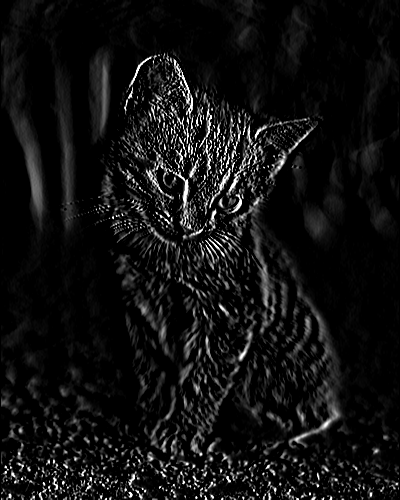

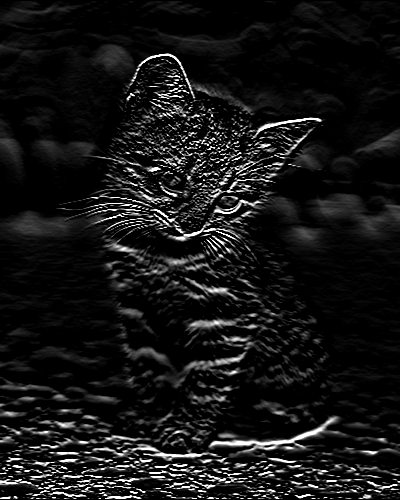

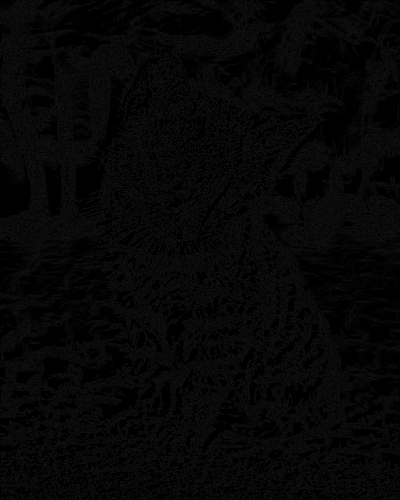

In [33]:
cv2_imshow(first_derivative_x)
cv2_imshow(first_derivative_y)
cv2_imshow(combine)

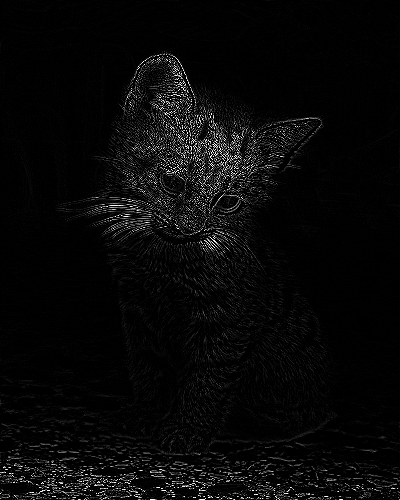

In [34]:
second_order_filter = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32)
second_order_derivative = cv2.filter2D(my_image, -1, second_order_filter)
cv2_imshow(second_order_derivative)

#gausian noise, so i am applying linear filter

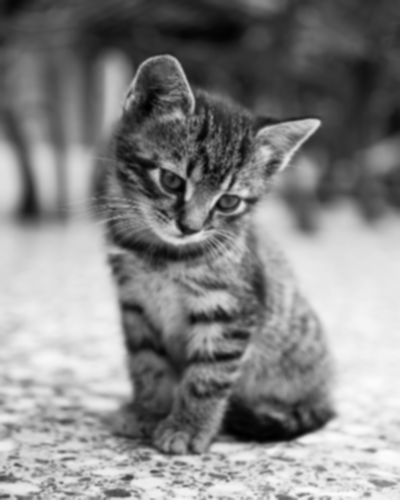

In [35]:
blurred_image = cv2.GaussianBlur(my_image, (5, 5), 0)
cv2_imshow(blurred_image)

In [36]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [38]:
flattened_image = blurred_image.flatten()
flattened_image=np.array(flattened_image).reshape(-1,1)
labels = np.random.randint(2, size=200000)

X_train, X_test, y_train, y_test = train_test_split(flattened_image, labels, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.49955


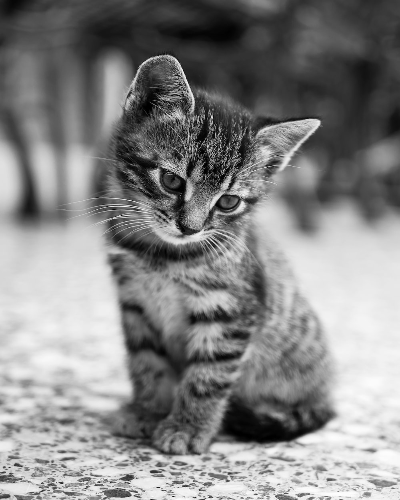

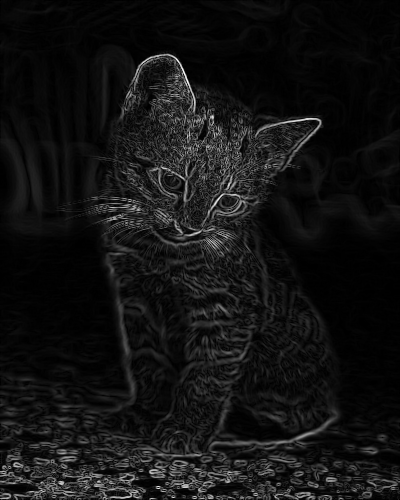

In [42]:
sobel_x = cv2.Sobel(my_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(my_image, cv2.CV_64F, 0, 1, ksize=3)
edge_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

edge_magnitude = cv2.normalize(edge_magnitude, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
cv2_imshow(my_image)
cv2_imshow(edge_magnitude)

In [43]:
flattened_image = edge_magnitude.flatten()
flattened_image=np.array(flattened_image).reshape(-1,1)
labels = np.random.randint(2, size=200000)

X_train, X_test, y_train, y_test = train_test_split(flattened_image, labels, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.501575
